In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
heart_train = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv", header=None )
heart_test = pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv", header=None)

In [3]:
heart_test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
heart_train.sample(7)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
53219,0.997033,0.818991,0.409496,0.000000,0.207715,0.320475,0.376855,0.394659,0.397626,0.418398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69443,0.990698,0.937209,0.634884,0.318605,0.223256,0.186047,0.132558,0.113953,0.109302,0.113953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80601,1.000000,0.770979,0.414336,0.250000,0.241259,0.222028,0.220280,0.206294,0.213287,0.208042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
11162,0.943761,0.943761,0.342707,0.000000,0.223199,0.251318,0.240773,0.249561,0.240773,0.235501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20376,1.000000,0.892617,0.600671,0.255034,0.164430,0.117450,0.093960,0.057047,0.053691,0.026846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18821,1.000000,0.644914,0.007678,0.046065,0.051823,0.069098,0.130518,0.117083,0.136276,0.130518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34313,1.000000,0.927911,0.720887,0.530499,0.286506,0.114603,0.024030,0.014787,0.020333,0.053604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
heart_train.iloc[:, -1].value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

In [6]:
heart_train.iloc[:, -1]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [7]:
heart_train[187] = heart_train[187].astype(int)
heart_train[187].value_counts()

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [8]:
classes = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
class_names = {
    0: "Normal Beats",
    1: "Supraventricular Ectopy Beats",
    2: "Ventricular Ectopy Beats",
    3: "Fusion Beats",
    4: "Unclassifiable Beats"
}

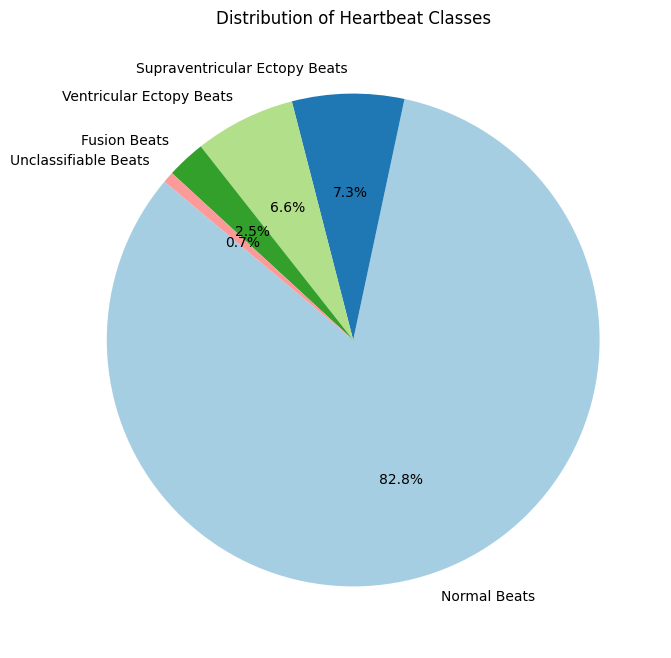

In [9]:
target_counts = heart_train[187].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=class_names.values(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Distribution of Heartbeat Classes')

plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

heart_train['binary_target'] = heart_train[187].apply(lambda x: 0 if x == 0 else 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    heart_train.iloc[:, :-2],
    heart_train['binary_target'],
    test_size=0.3,
    random_state=22
)

In [12]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

## First Exp: 
```python
LogisticRegression(
    solver="lbfgs",
    class_weight={0:0.3,1:0.7},
    max_iter=100000,
    C=1e9
)
``` 
```css
Binary Classification Metrics:
Accuracy: 0.89
Precision: 0.67
Recall: 0.66
F1-Score: 0.67
```

## Second Exp: 


In [28]:
binary_classifier = LogisticRegression(
#     solver="liblinear",
    class_weight={0:0.1,1:0.9},
    max_iter=10000,
    C=1e7
)
binary_classifier.fit(X_train, y_train)

LogisticRegression(C=10000000.0, class_weight={0: 0.1, 1: 0.9}, max_iter=10000)

In [29]:
y_pred_binary = binary_classifier.predict(X_test)

In [30]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [31]:
binary_cm = confusion_matrix(y_test, y_pred_binary)
binary_acc = accuracy_score(y_test, y_pred_binary)
binary_precision = precision_score(y_test, y_pred_binary)
binary_recall = recall_score(y_test, y_pred_binary)
binary_f1 = f1_score(y_test, y_pred_binary)

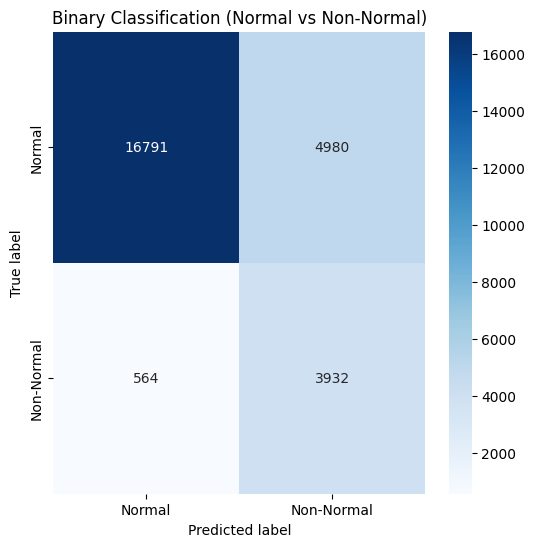

In [32]:
plot_confusion_matrix(binary_cm, classes=['Normal', 'Non-Normal'], title='Binary Classification (Normal vs Non-Normal)')

In [33]:
print("Binary Classification Metrics:")
print(f"Accuracy: {binary_acc:.2f}")
print(f"Precision: {binary_precision:.2f}")
print(f"Recall: {binary_recall:.2f}")
print(f"F1-Score: {binary_f1:.2f}")

Binary Classification Metrics:
Accuracy: 0.79
Precision: 0.44
Recall: 0.87
F1-Score: 0.59


In [34]:
from sklearn.ensemble import RandomForestClassifier

non_normal_samples = heart_train[heart_train[187] != 0]

In [35]:
non_normal_samples

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,binary_target
72471,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1,1
72472,0.983696,1.000000,0.331522,0.000000,0.108696,0.163043,0.130435,0.190217,0.288043,0.222826,...,0.483696,0.500000,0.494565,0.510870,0.51087,0.505435,0.472826,0.434783,1,1
72473,1.000000,0.911504,0.216814,0.000000,0.101770,0.199115,0.176991,0.194690,0.252212,0.238938,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1,1
72474,0.090498,0.126697,0.217195,0.361991,0.461538,0.556561,0.443439,0.434389,0.452489,0.511312,...,0.131222,0.140271,0.158371,0.176471,0.20362,0.212670,0.000000,0.000000,1,1
72475,0.961111,1.000000,0.551852,0.101852,0.040741,0.085185,0.094444,0.088889,0.085185,0.070370,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4,1
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4,1
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4,1
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4,1


In [36]:
X_multiclass = non_normal_samples.iloc[:, :-2] 
y_multiclass = non_normal_samples[187]

X_train_non_normal, X_test_non_normal, y_train_non_normal, y_test_non_normal = train_test_split(
    X_multiclass,
    y_multiclass,
    test_size=0.3,
    random_state=42
)

In [37]:
multiclass_classifier = RandomForestClassifier(random_state=42)
multiclass_classifier.fit(X_train_non_normal, y_train_non_normal)

RandomForestClassifier(random_state=42)

In [38]:
y_pred_multiclass = multiclass_classifier.predict(X_test_non_normal)

multiclass_cm = confusion_matrix(y_test_non_normal, y_pred_multiclass)

multiclass_report = classification_report(y_test_non_normal, y_pred_multiclass, target_names=['S', 'V', 'F', 'Q'])

In [39]:
print(multiclass_report)

              precision    recall  f1-score   support

           S       0.96      0.95      0.96       658
           V       0.96      0.98      0.97      1758
           F       0.95      0.78      0.86       209
           Q       0.99      0.99      0.99      1900

    accuracy                           0.97      4525
   macro avg       0.97      0.93      0.94      4525
weighted avg       0.97      0.97      0.97      4525



In [40]:
multiclass_cm = confusion_matrix(y_test_non_normal, y_pred_multiclass)

In [41]:
multiclass_report = classification_report(y_test_non_normal, y_pred_multiclass, target_names=['S', 'V', 'F', 'Q'])

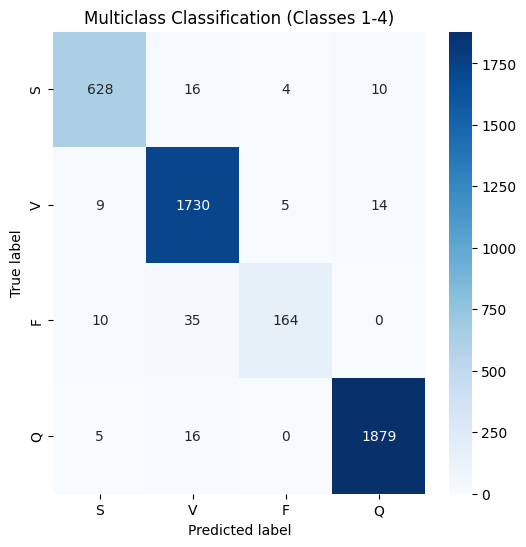

In [42]:
plot_confusion_matrix(multiclass_cm, classes=['S', 'V', 'F', 'Q'], title='Multiclass Classification (Classes 1-4)')

# Test set

In [70]:
y_pred_binary = binary_classifier.predict(heart_test.iloc[:, :-1])

In [72]:
y_test = heart_test[187].apply(lambda x: 0 if x == 0 else 1)

In [73]:
binary_cm = confusion_matrix(y_test, y_pred_binary)
binary_acc = accuracy_score(y_test, y_pred_binary)
binary_precision = precision_score(y_test, y_pred_binary)
binary_recall = recall_score(y_test, y_pred_binary)
binary_f1 = f1_score(y_test, y_pred_binary)

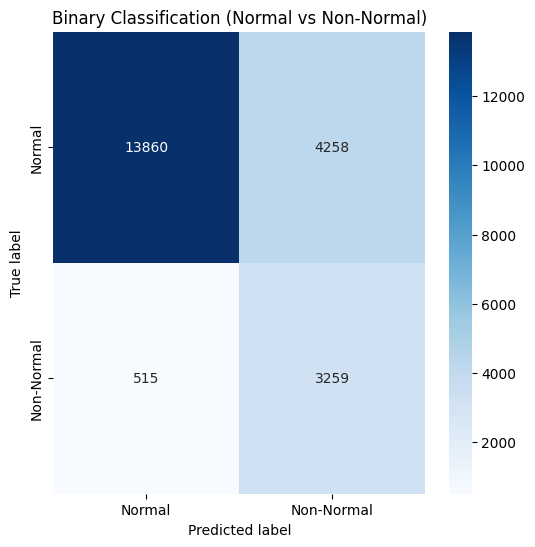

In [74]:
plot_confusion_matrix(binary_cm, classes=['Normal', 'Non-Normal'], title='Binary Classification (Normal vs Non-Normal)')

In [75]:
print("Binary Classification Metrics:")
print(f"Accuracy: {binary_acc:.2f}")
print(f"Precision: {binary_precision:.2f}")
print(f"Recall: {binary_recall:.2f}")
print(f"F1-Score: {binary_f1:.2f}")

Binary Classification Metrics:
Accuracy: 0.78
Precision: 0.43
Recall: 0.86
F1-Score: 0.58


In [46]:
heart_test[187] = heart_test[187].astype(int)

In [58]:
y_test_non_normal = heart_test[heart_test[187] != 0][187]

In [64]:
y_pred_multiclass = multiclass_classifier.predict(heart_test[heart_test[187] != 0].iloc[:, :-1])

multiclass_cm = confusion_matrix(y_test_non_normal, y_pred_multiclass)

multiclass_report = classification_report(y_test_non_normal, y_pred_multiclass, target_names=['S', 'V', 'F', 'Q'])

In [65]:
print(multiclass_report)

              precision    recall  f1-score   support

           S       0.97      0.92      0.94       556
           V       0.95      0.98      0.96      1448
           F       0.86      0.79      0.82       162
           Q       0.99      0.99      0.99      1608

    accuracy                           0.97      3774
   macro avg       0.94      0.92      0.93      3774
weighted avg       0.97      0.97      0.97      3774



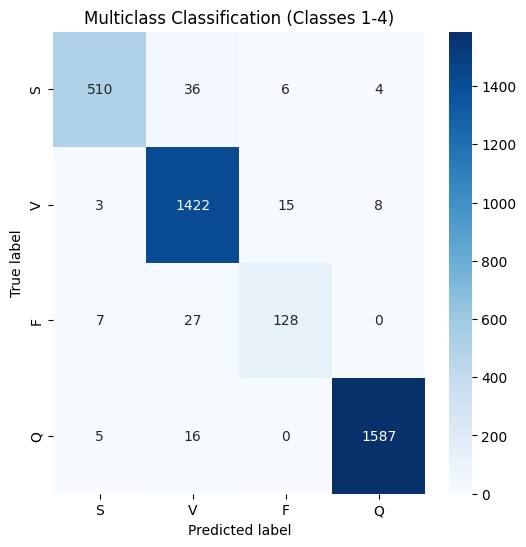

In [66]:
multiclass_cm = confusion_matrix(y_test_non_normal, y_pred_multiclass)
plot_confusion_matrix(multiclass_cm, classes=['S', 'V', 'F', 'Q'], title='Multiclass Classification (Classes 1-4)')